In [109]:
import pandas as pd
import numpy as np
from kneed import KneeLocator
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2)

In [71]:
X

array([[  1.32623968,  -9.65734914],
       [  2.28334129, -10.11857417],
       [  4.77896115,  -8.3532993 ],
       ...,
       [  2.18775054,  -0.19249945],
       [  4.07266843,  -9.50411347],
       [  3.78513958,  -9.90544255]])

In [73]:
y

array([0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1, 2, 0, 0, 1, 1, 2, 1,
       1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 1, 2, 2, 0, 1,
       2, 0, 2, 1, 1, 0, 2, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 1, 0, 1, 2, 2,
       2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 0, 1, 2, 1, 0, 1, 1, 0, 2, 0, 0, 0,
       2, 1, 2, 2, 2, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 1, 0, 1, 2, 2, 0, 2, 1, 0, 2, 1,
       0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 1, 2,
       1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 0,
       0, 2, 2, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1, 2,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 2, 1,
       2, 2, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 2, 0, 1, 1, 1, 2, 2,
       1, 2, 2, 1, 0, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1,

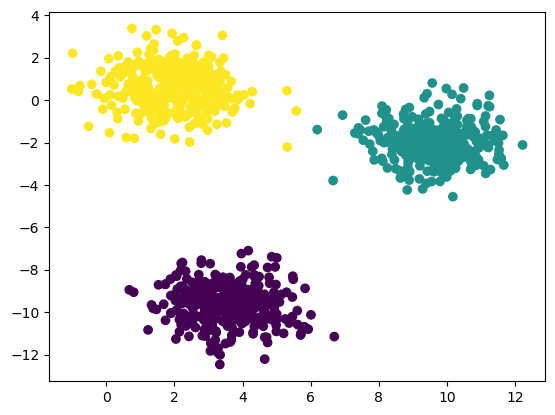

In [75]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [77]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [79]:
# Standardization------Feature Scaling Technique

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
# Select the K value using Elbow Method

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [83]:
wcss

[1339.9999999999998,
 671.208492258536,
 86.60690478819632,
 73.51514985897707,
 69.86922554752448,
 49.75972486880376,
 44.306923251878466,
 40.11891908037366,
 39.19038682648255,
 34.48699059519095]

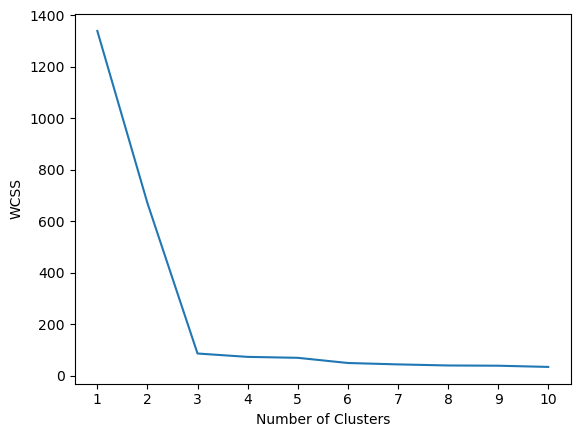

In [85]:
# Plot the Elbow Curve

plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [87]:
kmeans_new = KMeans(n_clusters=3, init='k-means++')

In [89]:
kmeans_new.fit_predict(X_train_scaled)

array([2, 1, 2, 2, 1, 1, 1, 0, 2, 2, 0, 2, 0, 0, 1, 2, 1, 1, 2, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 1,
       0, 1, 1, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 2, 1, 2, 2, 0, 0, 2, 0,
       0, 0, 2, 2, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0,
       0, 1, 0, 2, 2, 1, 0, 0, 1, 0, 1, 2, 2, 1, 1, 0, 2, 1, 0, 1, 0, 1,
       0, 1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1, 0, 2, 0, 2, 2,
       1, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 2, 0, 1, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 1, 0,
       0, 1, 2, 1, 1, 0, 0, 2, 1, 0, 2, 0, 1, 0, 2, 1, 1, 0, 2, 0, 2, 2,
       2, 2, 1, 0, 2, 2, 1, 1, 0, 2, 2, 0, 0, 1, 0, 1, 1, 1, 0, 2, 0, 0,
       0, 1, 1, 2, 2, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 2, 2, 2, 1, 0,
       0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 1, 0, 0, 0,
       0, 2, 2, 1, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 1, 1, 2, 1,
       2, 0, 1, 1, 2, 2, 2, 2, 1, 0, 0, 2, 1, 0, 0,

In [91]:
y_pred = kmeans_new.predict(X_test_scaled)

In [93]:
y_pred

array([1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 2, 1, 2, 2,
       0, 0, 0, 1, 0, 1, 0, 2, 1, 1, 2, 2, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 2, 1, 1, 1, 2, 1, 0, 2, 1, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 1, 1,
       0, 0, 0, 1, 2, 1, 0, 2, 2, 0, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1, 2, 0, 1, 2, 0, 2, 1,
       2, 0, 0, 2, 1, 1, 0, 2, 1, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 2, 1, 2,
       2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 0, 1, 0,
       1, 1, 1, 0, 2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 2, 1, 2, 2,
       1, 2, 1, 1, 2, 1, 0, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 0, 2, 0, 2, 2,
       2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0,
       2, 2, 1, 2, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 0, 0, 1, 2, 1, 1, 2, 2,
       2, 1, 1, 2, 0, 2, 1, 2, 2, 2, 1, 2, 0, 2, 0,

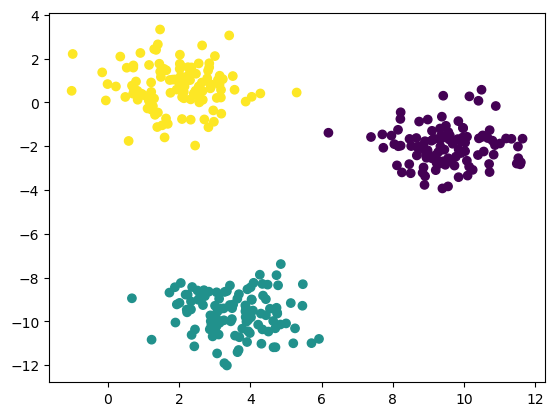

In [95]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)
plt.show()

In [101]:
# Validating the K value:    1)Knee Locator    2)Silhoutee Scoring

kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')

In [103]:
kl.elbow

3

In [105]:
# So, the K value we should use is 3 according t

In [113]:
## Silhoutee Scoring

silhoutee_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhoutee_coefficients.append(score)

In [115]:
silhoutee_coefficients

[0.5404946528681771,
 0.7990414153199756,
 0.6489420382430985,
 0.5154911799109669,
 0.37523108726551047,
 0.3577724046205807,
 0.34963131386868196,
 0.3369809510302799,
 0.3377014216212677]

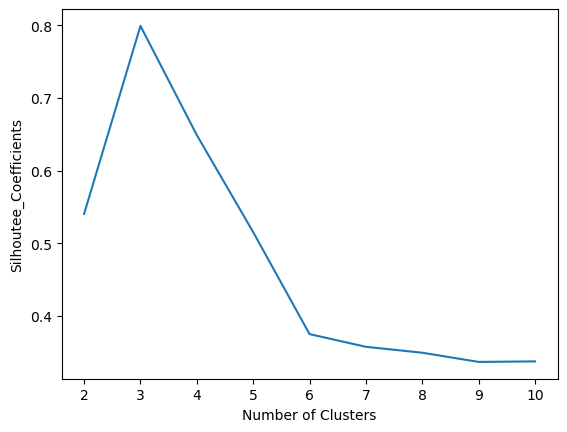

In [117]:
# Plot the Silhoutee Curve. We need to check the highest point in the y value and then select the x value with respect to that y_value

plt.plot(range(2, 11), silhoutee_coefficients)
plt.xticks(range(2, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutee_Coefficients')
plt.show()

In [119]:
# So, the K value we should use is 3 according to the Silhoutee_Coeficient Curve